## 1. Data Loading

Load the data from "gamezone-orders-data.xlsx" into a dataframe.


In [11]:
import pandas as pd

# Read the Excel file into a pandas DataFrame
df = pd.read_excel("gamezone-orders-data.xlsx")

# Print the first 5 rows of the DataFrame
print(df.head())

    USER_ID           ORDER_ID          PURCHASE_TS    SHIP_TS  \
0  2c06175e   0001328c3c220830  2020-12-24 00:00:00 2020-12-13   
1  ee8e5bc2  0002af7a5c6100772  2020-10-01 00:00:00 2020-09-21   
2  9eb4efe0   0002b8350e167074  2020-04-21 00:00:00 2020-02-16   
3  cac7cbaf   0006d06b98385729  2020-04-07 00:00:00 2020-04-04   
4  6b0230bc   00097279a2f46150  2020-11-24 00:00:00 2020-08-02   

                PRODUCT_NAME PRODUCT_ID  USD_PRICE PURCHASE_PLATFORM  \
0            Nintendo Switch       e682     168.00           website   
1            Nintendo Switch       e682     160.61           website   
2            Nintendo Switch       8d0d     151.20           website   
3  Sony PlayStation 5 Bundle       54ed    1132.82           website   
4            Nintendo Switch       8d0d      33.89           website   

  MARKETING_CHANNEL ACCOUNT_CREATION_METHOD COUNTRY_CODE  
0         affiliate                 unknown           US  
1            direct                 desktop         

In [12]:
# Print the column names and their data types
print(df.dtypes)

USER_ID                            object
ORDER_ID                           object
PURCHASE_TS                        object
SHIP_TS                    datetime64[ns]
PRODUCT_NAME                       object
PRODUCT_ID                         object
USD_PRICE                         float64
PURCHASE_PLATFORM                  object
MARKETING_CHANNEL                  object
ACCOUNT_CREATION_METHOD            object
COUNTRY_CODE                       object
dtype: object


In [13]:
# Print the column names and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21864 entries, 0 to 21863
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   USER_ID                  21864 non-null  object        
 1   ORDER_ID                 21864 non-null  object        
 2   PURCHASE_TS              21864 non-null  object        
 3   SHIP_TS                  21864 non-null  datetime64[ns]
 4   PRODUCT_NAME             21864 non-null  object        
 5   PRODUCT_ID               21864 non-null  object        
 6   USD_PRICE                21859 non-null  float64       
 7   PURCHASE_PLATFORM        21864 non-null  object        
 8   MARKETING_CHANNEL        21781 non-null  object        
 9   ACCOUNT_CREATION_METHOD  21781 non-null  object        
 10  COUNTRY_CODE             21826 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 1.8+ MB


## 2. Data Cleaning

Clean the data, including handling missing values, removing duplicates, and addressing any inconsistencies.

In [14]:
df.isnull().sum().to_frame(name='Missing Values')

,Missing Values
USER_ID,0
ORDER_ID,0
PURCHASE_TS,0
SHIP_TS,0
PRODUCT_NAME,0
PRODUCT_ID,0
USD_PRICE,5
PURCHASE_PLATFORM,0
MARKETING_CHANNEL,83
ACCOUNT_CREATION_METHOD,83


Fill missing ```MARKETING_CHANNEL```, ```ACCOUNT_CREATION_METHOD```, and ```COUNTRY_CODE``` values with 'Unknown'.

In [15]:
# Fill missing values in specified columns with 'Unknown'
df['MARKETING_CHANNEL'] = df['MARKETING_CHANNEL'].fillna('Unknown')
df['ACCOUNT_CREATION_METHOD'] = df['ACCOUNT_CREATION_METHOD'].fillna('Unknown')
df['COUNTRY_CODE'] = df['COUNTRY_CODE'].fillna('Unknown')

# Print the number of missing values per column after filling
print(df.isnull().sum())

USER_ID                    0
ORDER_ID                   0
PURCHASE_TS                0
SHIP_TS                    0
PRODUCT_NAME               0
PRODUCT_ID                 0
USD_PRICE                  5
PURCHASE_PLATFORM          0
MARKETING_CHANNEL          0
ACCOUNT_CREATION_METHOD    0
COUNTRY_CODE               0
dtype: int64


Handle the remaining missing values in the ```USD_PRICE``` column. Since there are only 5 missing values, dropping these rows is a reasonable approach.

In [16]:
# Drop rows with missing values in the 'USD_PRICE' column
df = df.dropna(subset=['USD_PRICE'])

# Print the number of missing values per column after dropping
print(df.isnull().sum())

USER_ID                    0
ORDER_ID                   0
PURCHASE_TS                0
SHIP_TS                    0
PRODUCT_NAME               0
PRODUCT_ID                 0
USD_PRICE                  0
PURCHASE_PLATFORM          0
MARKETING_CHANNEL          0
ACCOUNT_CREATION_METHOD    0
COUNTRY_CODE               0
dtype: int64


In [17]:
display(df.isnull().sum().to_frame(name='Missing Values').to_markdown(numalign="left", stralign="left"))

'|                         | Missing Values   |\n|:------------------------|:-----------------|\n| USER_ID                 | 0                |\n| ORDER_ID                | 0                |\n| PURCHASE_TS             | 0                |\n| SHIP_TS                 | 0                |\n| PRODUCT_NAME            | 0                |\n| PRODUCT_ID              | 0                |\n| USD_PRICE               | 0                |\n| PURCHASE_PLATFORM       | 0                |\n| MARKETING_CHANNEL       | 0                |\n| ACCOUNT_CREATION_METHOD | 0                |\n| COUNTRY_CODE            | 0                |'

In [18]:
# .to_markdown : Prints DataFrame in Markdown-friendly format.

trial_df = pd.DataFrame(
    data={"animal_1": ["elk", "pig"], "animal_2": ["dog", "quetzal"]}
)
print(trial_df.to_markdown())

|    | animal_1   | animal_2   |
|---:|:-----------|:-----------|
|  0 | elk        | dog        |
|  1 | pig        | quetzal    |


Remove duplicate rows from the DataFrame to ensure data integrity.

In [19]:
# Remove duplicate rows
initial_rows = len(df)
df.drop_duplicates(inplace=True)
rows_after_dropping = len(df)

# Display the number of duplicate rows removed
print(f"Number of duplicate rows removed: {initial_rows - rows_after_dropping}")

# Display the number of rows after dropping duplicates
print(f"Number of rows after dropping duplicates: {rows_after_dropping}")

Number of duplicate rows removed: 35
Number of rows after dropping duplicates: 21824


Inspect columns for inconsistencies in data entry and standardize them where necessary. Focus on categorical columns like ```PURCHASE_PLATFORM```, ```MARKETING_CHANNEL```, ```ACCOUNT_CREATION_METHOD```, and ```COUNTRY_CODE```.

In [20]:
# Standardize capitalization in categorical columns
for col in ['PURCHASE_PLATFORM', 'MARKETING_CHANNEL', 'ACCOUNT_CREATION_METHOD', 'COUNTRY_CODE']:
    if df[col].dtype == 'object':
        df[col] = df[col].str.lower()

# Print unique values in standardized columns to check for inconsistencies
print("Unique values after standardization:")
for col in ['PURCHASE_PLATFORM', 'MARKETING_CHANNEL', 'ACCOUNT_CREATION_METHOD', 'COUNTRY_CODE']:
    print(f"--- {col} ---")
    print(df[col].unique())

Unique values after standardization:
--- PURCHASE_PLATFORM ---
['website' 'mobile app']
--- MARKETING_CHANNEL ---
['affiliate' 'direct' 'email' 'social media' 'unknown']
--- ACCOUNT_CREATION_METHOD ---
['unknown' 'desktop' 'mobile' 'tablet' 'tv']
--- COUNTRY_CODE ---
['us' 'de' 'au' 'tr' 'ph' 'gb' 'br' 'be' 'fr' 'kr' 'es' 'ua' 'at' 'in'
 'il' 'pl' 'dk' 'ar' 'ch' 'cl' 'ro' 'vn' 'jm' 'it' 'bb' 'jp' 'no' 'hu'
 'ca' 've' 'nz' 'cy' 'bo' 'co' 'nl' 'se' 'kw' 'za' 'si' 'ru' 'gr' 'lt'
 'mx' 'th' 'uy' 'cz' 'hk' 'ee' 'sg' 'kh' 'ie' 'iq' 'fi' 'tz' 'tw'
 'unknown' 'qa' 'pt' 'pe' 'my' 'ae' 'lv' 'eg' 'ci' 'bs' 'is' 'cr' 'mt'
 'ma' 'ht' 'sa' 'ke' 'jo' 'bg' 'bd' 'tt' 'lk' 'ad' 'sn' 'ng' 'pf' 'pk'
 'lu' 'kz' 'vi' 'sk' 'gt' 'gh' 'tn' 'gl' 'ni' 'do' 'mv' 'ky' 'mn' 'bh'
 'mc' 'lb' 'kn' 'pr' 'hr' 'zw' 'fj' 'hn' 'pa' 'np' 'ug' 'je' 'bw' 'ec'
 'om' 'mm' 'mu' 'pg' 'al' 'by' 'eu' 'dz' 'ml' 'ps' 'so' 'sv' 'mk' 'rs'
 'im' 'vc' 'gu' 'mo' 'zm' 'ge' 'az' 'bm' 'aw' 'sl' 'cm' 'ao' 'ba' 'mp'
 'ap' 'ai' 'me' 'cn' 'id' '

In [21]:
pip install pycountry

Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd
import pycountry  # For validating country codes

# List of columns to standardize
columns_to_standardize = ['PURCHASE_PLATFORM', 'MARKETING_CHANNEL', 'ACCOUNT_CREATION_METHOD', 'COUNTRY_CODE']

# Step 1: Verify column existence
missing_cols = [col for col in columns_to_standardize if col not in df.columns]
if missing_cols:
    print(f"Error: The following columns are missing: {missing_cols}")
else:
    print("All specified columns are present in the DataFrame.")

# Step 2: Standardize capitalization and remove whitespace
for col in columns_to_standardize:
    if col in df.columns and df[col].dtype in ['object', 'string']:
        df[col] = df[col].str.lower().str.strip()

# Step 3: Specific standardization for MARKETING_CHANNEL
# Map similar values for consistency
marketing_channel_mapping = {
    'social media': 'social',
    'social': 'social',
    'affiliate': 'affiliate',
    'direct': 'direct',
    'email': 'email',
    'unknown': 'unknown'
}
if 'MARKETING_CHANNEL' in df.columns:
    df['MARKETING_CHANNEL'] = df['MARKETING_CHANNEL'].map(marketing_channel_mapping).fillna('unknown')

# Step 4: Validate and standardize COUNTRY_CODE
# Get list of valid ISO 3166-1 alpha-2 codes
valid_country_codes = {country.alpha_2.lower() for country in pycountry.countries}
valid_country_codes.add('unknown')  # Allow 'unknown' as a valid value
if 'COUNTRY_CODE' in df.columns:
    # Mark invalid country codes
    invalid_codes = set(df['COUNTRY_CODE']) - valid_country_codes
    if invalid_codes:
        print(f"Warning: Invalid country codes found: {invalid_codes}")
        # Replace invalid codes with 'unknown'
        df['COUNTRY_CODE'] = df['COUNTRY_CODE'].where(df['COUNTRY_CODE'].isin(valid_country_codes), 'unknown')

# Step 5: Display unique values and counts for inspection
print("\nUnique values and counts after standardization:")
for col in columns_to_standardize:
    if col in df.columns:
        print(f"\n--- {col} ---")
        print(df[col].value_counts(dropna=False))
    else:
        print(f"\n--- Column {col} not found in DataFrame ---")

All specified columns are present in the DataFrame.

Unique values and counts after standardization:

--- PURCHASE_PLATFORM ---
website       19748
mobile app     2076
Name: PURCHASE_PLATFORM, dtype: int64

--- MARKETING_CHANNEL ---
direct       17402
email         3252
affiliate      717
social         323
unknown        130
Name: MARKETING_CHANNEL, dtype: int64

--- ACCOUNT_CREATION_METHOD ---
desktop    16431
mobile      4223
unknown      822
tablet       323
tv            25
Name: ACCOUNT_CREATION_METHOD, dtype: int64

--- COUNTRY_CODE ---
us    10275
gb     1806
ca      952
au      893
de      853
      ...  
bh        1
kn        1
fj        1
np        1
lc        1
Name: COUNTRY_CODE, Length: 149, dtype: int64


In [23]:
df.head()

,USER_ID,ORDER_ID,PURCHASE_TS,SHIP_TS,PRODUCT_NAME,PRODUCT_ID,USD_PRICE,PURCHASE_PLATFORM,MARKETING_CHANNEL,ACCOUNT_CREATION_METHOD,COUNTRY_CODE
0,2c06175e,0001328c3c220830,2020-12-24 00:00:00,2020-12-13,Nintendo Switch,e682,168.00,website,affiliate,unknown,us
1,ee8e5bc2,0002af7a5c6100772,2020-10-01 00:00:00,2020-09-21,Nintendo Switch,e682,160.61,website,direct,desktop,de
2,9eb4efe0,0002b8350e167074,2020-04-21 00:00:00,2020-02-16,Nintendo Switch,8d0d,151.20,website,direct,desktop,us
3,cac7cbaf,0006d06b98385729,2020-04-07 00:00:00,2020-04-04,Sony PlayStation 5 Bundle,54ed,1132.82,website,direct,desktop,au
4,6b0230bc,00097279a2f46150,2020-11-24 00:00:00,2020-08-02,Nintendo Switch,8d0d,33.89,website,direct,desktop,tr


Verify that the ```USD_PRICE``` column contains valid numerical data and handle any non-numeric entries if found, potentially converting the column to a numeric type if it isn't already.

In [24]:
# Convert 'USD_PRICE' to numeric, coercing errors to NaN
df['USD_PRICE'] = pd.to_numeric(df['USD_PRICE'], errors='coerce')

# Check for any remaining non-numeric entries after coercion (should be 0 if coercion worked)
non_numeric_price = df['USD_PRICE'].isnull().sum()
print(f"Number of non-numeric entries in USD_PRICE after coercion: {non_numeric_price}")

Number of non-numeric entries in USD_PRICE after coercion: 0


In [25]:
# If there are any NaN values introduced by coercion, drop those rows (though none are expected based on previous steps)
if non_numeric_price > 0:
    df.dropna(subset=['USD_PRICE'], inplace=True)
    print(f"Dropped {non_numeric_price} rows with non-numeric USD_PRICE after coercion.")

# Display the data type of the 'USD_PRICE' column to confirm it's numeric
print(f"Data type of USD_PRICE column: {df['USD_PRICE'].dtype}")

Data type of USD_PRICE column: float64


## 3. Data Exploration

Perform exploratory data analysis (EDA) to understand the data distribution, identify trends, and find correlations between variables. Identify key questions the analysis should answer for stakeholders based on the data.

- Display descriptive statistics for 'USD_PRICE', 
- Analyze unique values and counts for categorical columns, 
- Extract and analyze date features from timestamp columns, and 
- Calculate the correlation matrix for relevant numerical features. 

In [26]:
# 1. Display descriptive statistics for 'USD_PRICE'
print("--- Descriptive statistics for USD_PRICE ---")
df['USD_PRICE'].describe()

--- Descriptive statistics for USD_PRICE ---


count    21824.000000
mean       281.192643
std        366.540014
min          0.000000
25%        126.000000
50%        168.000000
75%        355.110000
max       3146.880000
Name: USD_PRICE, dtype: float64

In [27]:
# 2. Calculate and display unique values and top occurrences for categorical columns
categorical_cols = ['PURCHASE_PLATFORM', 'MARKETING_CHANNEL', 'ACCOUNT_CREATION_METHOD', 'COUNTRY_CODE', 'PRODUCT_NAME']
print("\n--- Unique values and top occurrences for categorical columns ---")
for col in categorical_cols:
    print(f"\n--- {col} ---")
    unique_count = df[col].nunique()
    top_values = df[col].value_counts().head()
    print(f"Number of unique values: {unique_count}")
    top_values.to_frame(name='Count')


--- Unique values and top occurrences for categorical columns ---

--- PURCHASE_PLATFORM ---
Number of unique values: 2

--- MARKETING_CHANNEL ---
Number of unique values: 5

--- ACCOUNT_CREATION_METHOD ---
Number of unique values: 5

--- COUNTRY_CODE ---
Number of unique values: 149

--- PRODUCT_NAME ---
Number of unique values: 9


In [28]:
# 3. Explore the distribution of 'PURCHASE_TS' and 'SHIP_TS'
print("\n--- Distribution of PURCHASE_TS and SHIP_TS ---")
df['PURCHASE_TS'] = pd.to_datetime(df['PURCHASE_TS'])
df['SHIP_TS'] = pd.to_datetime(df['SHIP_TS'])

df['purchase_year'] = df['PURCHASE_TS'].dt.year
df['purchase_month'] = df['PURCHASE_TS'].dt.month
df['purchase_dayofweek'] = df['PURCHASE_TS'].dt.dayofweek # Monday=0, Sunday=6
df['purchase_hour'] = df['PURCHASE_TS'].dt.hour

df['ship_year'] = df['SHIP_TS'].dt.year
df['ship_month'] = df['SHIP_TS'].dt.month
df['ship_dayofweek'] = df['SHIP_TS'].dt.dayofweek
df['ship_hour'] = df['SHIP_TS'].dt.hour

print("\nPurchase Year Distribution:")
display(df['purchase_year'].value_counts().sort_index().to_frame(name='Count').to_markdown(numalign="left", stralign="left"))
print("\nPurchase Month Distribution:")
display(df['purchase_month'].value_counts().sort_index().to_frame(name='Count').to_markdown(numalign="left", stralign="left"))
print("\nPurchase Day of Week Distribution:")
display(df['purchase_dayofweek'].value_counts().sort_index().to_frame(name='Count').to_markdown(numalign="left", stralign="left"))
print("\nPurchase Hour Distribution:")
display(df['purchase_hour'].value_counts().sort_index().to_frame(name='Count').to_markdown(numalign="left", stralign="left"))

# We can similarly display ship date distributions if needed



--- Distribution of PURCHASE_TS and SHIP_TS ---


ParserError: String does not contain a date:    present at position 480

**There is an issue parsing the ```PURCHASE_TS``` column to datetime, likely due to some invalid entries. 
I will use errors='coerce' in pd.to_datetime to turn invalid parsing into NaT (Not a Time)**

In [29]:
# 3. Explore the distribution of 'PURCHASE_TS' and 'SHIP_TS'
print("\n--- Distribution of PURCHASE_TS and SHIP_TS ---")
# Convert with error handling
df['PURCHASE_TS'] = pd.to_datetime(df['PURCHASE_TS'], errors='coerce')
df['SHIP_TS'] = pd.to_datetime(df['SHIP_TS'], errors='coerce')

# Drop rows where timestamp conversion failed
df.dropna(subset=['PURCHASE_TS', 'SHIP_TS'], inplace=True)

df['purchase_year'] = df['PURCHASE_TS'].dt.year
df['purchase_month'] = df['PURCHASE_TS'].dt.month
df['purchase_dayofweek'] = df['PURCHASE_TS'].dt.dayofweek # Monday=0, Sunday=6
df['purchase_hour'] = df['PURCHASE_TS'].dt.hour

df['ship_year'] = df['SHIP_TS'].dt.year
df['ship_month'] = df['SHIP_TS'].dt.month
df['ship_dayofweek'] = df['SHIP_TS'].dt.dayofweek
df['ship_hour'] = df['SHIP_TS'].dt.hour

print("\nPurchase Year Distribution:")
display(df['purchase_year'].value_counts().sort_index().to_frame(name='Count').to_markdown(numalign="left", stralign="left"))
print("\nPurchase Month Distribution:")
display(df['purchase_month'].value_counts().sort_index().to_frame(name='Count').to_markdown(numalign="left", stralign="left"))
print("\nPurchase Day of Week Distribution:")
display(df['purchase_dayofweek'].value_counts().sort_index().to_frame(name='Count').to_markdown(numalign="left", stralign="left"))
print("\nPurchase Hour Distribution:")
display(df['purchase_hour'].value_counts().sort_index().to_frame(name='Count').to_markdown(numalign="left", stralign="left"))


--- Distribution of PURCHASE_TS and SHIP_TS ---

Purchase Year Distribution:


'|      | Count   |\n|:-----|:--------|\n| 2019 | 6610    |\n| 2020 | 13363   |\n| 2021 | 1846    |'


Purchase Month Distribution:


'|    | Count   |\n|:---|:--------|\n| 1  | 1785    |\n| 2  | 1825    |\n| 3  | 1509    |\n| 4  | 1723    |\n| 5  | 1727    |\n| 6  | 1613    |\n| 7  | 1692    |\n| 8  | 1796    |\n| 9  | 2176    |\n| 10 | 1549    |\n| 11 | 1955    |\n| 12 | 2469    |'


Purchase Day of Week Distribution:


'|    | Count   |\n|:---|:--------|\n| 0  | 3087    |\n| 1  | 3025    |\n| 2  | 3113    |\n| 3  | 3108    |\n| 4  | 3194    |\n| 5  | 3115    |\n| 6  | 3177    |'


Purchase Hour Distribution:


'|    | Count   |\n|:---|:--------|\n| 0  | 21813   |\n| 1  | 6       |'

In [30]:
print("\nPurchase Year Distribution:")
df['purchase_year'].value_counts().sort_index().to_frame(name='Count')


Purchase Year Distribution:


,Count
2019,6610
2020,13363
2021,1846


In [31]:
print("\nPurchase Month Distribution:")
df['purchase_month'].value_counts().sort_index().to_frame(name='Count')


Purchase Month Distribution:


,Count
1,1785
2,1825
3,1509
4,1723
5,1727
6,1613
7,1692
8,1796
9,2176
10,1549


In [32]:
print("\nPurchase Day of Week Distribution:")
df['purchase_dayofweek'].value_counts().sort_index().to_frame(name='Count')


Purchase Day of Week Distribution:


,Count
0,3087
1,3025
2,3113
3,3108
4,3194
5,3115
6,3177


In [33]:
print("\nPurchase Hour Distribution:")
df['purchase_hour'].value_counts().sort_index().to_frame(name='Count')


Purchase Hour Distribution:


,Count
0,21813
1,6


In [34]:
# 4. Calculate and display the correlation matrix
# Select relevant numerical columns
numerical_cols_for_corr = ['USD_PRICE', 'purchase_year', 'purchase_month', 'purchase_dayofweek', 'purchase_hour', 'ship_year', 'ship_month', 'ship_dayofweek', 'ship_hour']
correlation_matrix = df[numerical_cols_for_corr].corr()

print("\n--- Correlation matrix for numerical features ---")
correlation_matrix


--- Correlation matrix for numerical features ---


,USD_PRICE,purchase_year,purchase_month,purchase_dayofweek,purchase_hour,ship_year,ship_month,ship_dayofweek,ship_hour
USD_PRICE,1.000000,0.072347,0.018930,-0.000510,0.007995,0.071360,0.018683,0.002044,NaN
purchase_year,0.072347,1.000000,-0.264670,0.000666,0.006211,0.978591,-0.255367,0.000346,NaN
purchase_month,0.018930,-0.264670,1.000000,-0.007976,0.024492,-0.227992,0.921310,0.013646,NaN
purchase_dayofweek,-0.000510,0.000666,-0.007976,1.000000,-0.000202,-0.003414,-0.000959,-0.150848,NaN
purchase_hour,0.007995,0.006211,0.024492,-0.000202,1.000000,0.010851,-0.004638,-0.001321,NaN
ship_year,0.071360,0.978591,-0.227992,-0.003414,0.010851,1.000000,-0.284851,0.005612,NaN
ship_month,0.018683,-0.255367,0.921310,-0.000959,-0.004638,-0.284851,1.000000,-0.000310,NaN
ship_dayofweek,0.002044,0.000346,0.013646,-0.150848,-0.001321,0.005612,-0.000310,1.000000,NaN
ship_hour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Formulating key questions for stakeholders based on the initial exploration.


1. Product Performance and Popularity:
- Which products are the most popular in terms of sales volume and revenue?
- How does the price of a product relate to its purchase frequency?

2. Customer Behavior and Trends:
- What are the peak times (year, month, day of week, hour) for purchases and shipping?
- Which purchase platforms (website vs. mobile app) are most used, and how do their sales volumes compare?
- What are the most effective marketing channels for driving sales?
- Are there any notable differences in purchase behavior based on the account creation method?
- Which countries contribute the most to sales revenue and volume?

3. Operational Efficiency:
- Is there a significant correlation between purchase time and ship time? (Based on the correlation matrix, this seems weak, but further investigation might be needed)
- Are there specific times or periods when shipping volume is highest, potentially impacting logistics?

These questions can guide further, more in-depth analysis and help stakeholders make informed business decisions.


In [35]:
# To answer the question about the most popular products by sales volume, I will group the DataFrame by 'PRODUCT_NAME' and count the number of orders for each product. To answer the question about popularity by revenue, I will group by 'PRODUCT_NAME' and sum the 'USD_PRICE' for each product.
# To explore the relationship between price and purchase frequency, I will calculate the average price for each product and compare it with its purchase count.

# 1. Which products are the most popular in terms of sales volume and revenue?
print("\n--- 1. Product Performance and Popularity ---")

# Popularity by sales volume (number of orders)
product_sales_volume = df['PRODUCT_NAME'].value_counts().reset_index()
product_sales_volume.columns = ['PRODUCT_NAME', 'Sales Volume']
print("\nTop 10 Products by Sales Volume:")
print(product_sales_volume.head(10))

# Popularity by revenue (total USD price)
product_revenue = df.groupby('PRODUCT_NAME')['USD_PRICE'].sum().reset_index()
product_revenue.columns = ['PRODUCT_NAME', 'Total Revenue (USD)']
product_revenue_sorted = product_revenue.sort_values(by='Total Revenue (USD)', ascending=False)
print("\nTop 10 Products by Total Revenue (USD):")
print(product_revenue_sorted.head(10))


--- 1. Product Performance and Popularity ---

Top 10 Products by Sales Volume:
                     PRODUCT_NAME  Sales Volume
0                 Nintendo Switch         10385
1          27in 4K gaming monitor          4627
2  JBL Quantum 100 Gaming Headset          4291
3       Sony PlayStation 5 Bundle           977
4               Dell Gaming Mouse           715
5         Lenovo IdeaPad Gaming 3           669
6      Acer Nitro V Gaming Laptop            87
7      27inches 4k gaming monitor            61
8        Razer Pro Gaming Headset             7

Top 10 Products by Total Revenue (USD):
                     PRODUCT_NAME  Total Revenue (USD)
0          27in 4K gaming monitor           1932737.73
6                 Nintendo Switch           1658597.39
8       Sony PlayStation 5 Bundle           1589243.85
5         Lenovo IdeaPad Gaming 3            735506.56
4  JBL Quantum 100 Gaming Headset             96109.63
2      Acer Nitro V Gaming Laptop             65661.18
3            

In [36]:
# 2. How does the price of a product relate to its purchase frequency?
# Calculate average price per product
product_avg_price = df.groupby('PRODUCT_NAME')['USD_PRICE'].mean().reset_index()
product_avg_price.columns = ['PRODUCT_NAME', 'Average Price (USD)']

# Combine sales volume and average price
product_popularity_price = pd.merge(product_sales_volume, product_avg_price, on='PRODUCT_NAME')

print("\nProduct Sales Volume vs. Average Price (Top 10 by Sales Volume):")
# Display a sample of products to show the relationship
print(product_popularity_price.sort_values(by='Sales Volume', ascending=False).head(10))
print("\nProduct Sales Volume vs. Average Price (Top 10 by Average Price):")
print(product_popularity_price.sort_values(by='Average Price (USD)', ascending=False).head(10))


Product Sales Volume vs. Average Price (Top 10 by Sales Volume):
                     PRODUCT_NAME  Sales Volume  Average Price (USD)
0                 Nintendo Switch         10385           159.710870
1          27in 4K gaming monitor          4627           417.708608
2  JBL Quantum 100 Gaming Headset          4291            22.397956
3       Sony PlayStation 5 Bundle           977          1626.656960
4               Dell Gaming Mouse           715            51.034979
5         Lenovo IdeaPad Gaming 3           669          1099.411898
6      Acer Nitro V Gaming Laptop            87           754.726207
7      27inches 4k gaming monitor            61           349.333607
8        Razer Pro Gaming Headset             7           126.318571

Product Sales Volume vs. Average Price (Top 10 by Average Price):
                     PRODUCT_NAME  Sales Volume  Average Price (USD)
3       Sony PlayStation 5 Bundle           977          1626.656960
5         Lenovo IdeaPad Gaming 3      

In [37]:
# To answer the questions about peak times, I will use the previously extracted time features (purchase_year, purchase_month, purchase_dayofweek, purchase_hour, ship_year, ship_month, ship_dayofweek, ship_hour) and count the occurrences for each time unit.
# 3. What are the peak times (year, month, day of week, hour) for purchases and shipping?
print("\n--- 2. Customer Behavior and Trends: Peak Times ---")

print("\nPeak Times for Purchases:")
print("By Year:")
print(df['purchase_year'].value_counts().sort_index().to_frame(name='Count'))
print("\nBy Month:")
print(df['purchase_month'].value_counts().sort_index().to_frame(name='Count'))
print("\nBy Day of Week:")
print(df['purchase_dayofweek'].value_counts().sort_index().to_frame(name='Count'))
print("\nBy Hour:")
print(df['purchase_hour'].value_counts().sort_index().to_frame(name='Count'))

print("\nPeak Times for Shipping:")
print("By Year:")
print(df['ship_year'].value_counts().sort_index().to_frame(name='Count'))
print("\nBy Month:")
print(df['ship_month'].value_counts().sort_index().to_frame(name='Count'))
print("\nBy Day of Week:")
print(df['ship_dayofweek'].value_counts().sort_index().to_frame(name='Count'))
print("\nBy Hour:")
print(df['ship_hour'].value_counts().sort_index().to_frame(name='Count'))



--- 2. Customer Behavior and Trends: Peak Times ---

Peak Times for Purchases:
By Year:
      Count
2019   6610
2020  13363
2021   1846

By Month:
    Count
1    1785
2    1825
3    1509
4    1723
5    1727
6    1613
7    1692
8    1796
9    2176
10   1549
11   1955
12   2469

By Day of Week:
   Count
0   3087
1   3025
2   3113
3   3108
4   3194
5   3115
6   3177

By Hour:
   Count
0  21813
1      6

Peak Times for Shipping:
By Year:
      Count
2018     46
2019   6701
2020  13141
2021   1931

By Month:
    Count
1    1862
2    1905
3    1574
4    1703
5    1783
6    1628
7    1711
8    1820
9    2045
10   1576
11   1868
12   2344

By Day of Week:
   Count
0   3183
1   3073
2   3119
3   3133
4   3089
5   3093
6   3129

By Hour:
   Count
0  21819


In [38]:
# To answer the questions about purchase platforms, marketing channels, and account creation methods, I will count the occurrences of each category in the respective columns and display the top ones. To compare sales volumes for purchase platforms, I will group by 'PURCHASE_PLATFORM' and sum 'USD_PRICE'. For marketing channels and countries, I will perform similar aggregations to determine their contribution to sales volume and revenue.
# 4. Which purchase platforms (website vs. mobile app) are most used, and how do their sales volumes compare?
print("\n--- 2. Customer Behavior and Trends: Platforms and Channels ---")
print("\nPurchase Platform Usage:")
print(df['PURCHASE_PLATFORM'].value_counts().to_frame(name='Count'))

print("\nPurchase Platform Sales Volume (USD):")
platform_sales = df.groupby('PURCHASE_PLATFORM')['USD_PRICE'].sum().reset_index()
platform_sales.columns = ['PURCHASE_PLATFORM', 'Total Sales Volume (USD)']
print(platform_sales.sort_values(by='Total Sales Volume (USD)', ascending=False))


--- 2. Customer Behavior and Trends: Platforms and Channels ---

Purchase Platform Usage:
            Count
website     19743
mobile app   2076

Purchase Platform Sales Volume (USD):
  PURCHASE_PLATFORM  Total Sales Volume (USD)
1           website                5982597.86
0        mobile app                 153942.07


In [39]:
# 5. What are the most effective marketing channels for driving sales?
print("\nMost Frequent Marketing Channels:")
print(df['MARKETING_CHANNEL'].value_counts().head(10).to_frame(name='Count'))

print("\nMarketing Channel Sales Volume (USD):")
channel_sales = df.groupby('MARKETING_CHANNEL')['USD_PRICE'].sum().reset_index()
channel_sales.columns = ['MARKETING_CHANNEL', 'Total Sales Volume (USD)']
print(channel_sales.sort_values(by='Total Sales Volume (USD)', ascending=False).head(10))



Most Frequent Marketing Channels:
           Count
direct     17397
email       3252
affiliate    717
social       323
unknown      130

Marketing Channel Sales Volume (USD):
  MARKETING_CHANNEL  Total Sales Volume (USD)
1            direct                5196761.60
2             email                 611182.72
0         affiliate                 220798.81
3            social                  69526.37
4           unknown                  38270.43


In [40]:
# 6. Are there any notable differences in purchase behavior based on the account creation method?
print("\nAccount Creation Method Usage:")
print(df['ACCOUNT_CREATION_METHOD'].value_counts().to_frame(name='Count'))

print("\nAccount Creation Method Sales Volume (USD):")
account_method_sales = df.groupby('ACCOUNT_CREATION_METHOD')['USD_PRICE'].sum().reset_index()
account_method_sales.columns = ['ACCOUNT_CREATION_METHOD', 'Total Sales Volume (USD)']
print(account_method_sales.sort_values(by='Total Sales Volume (USD)', ascending=False))


Account Creation Method Usage:
         Count
desktop  16427
mobile    4222
unknown    822
tablet     323
tv          25

Account Creation Method Sales Volume (USD):
  ACCOUNT_CREATION_METHOD  Total Sales Volume (USD)
0                 desktop                4768087.24
1                  mobile                1039857.08
4                 unknown                 253857.04
2                  tablet                  69526.37
3                      tv                   5212.20


In [41]:
# 7. Which countries contribute the most to sales revenue and volume?
print("\nCountries by Sales Volume:")
country_sales_volume = df['COUNTRY_CODE'].value_counts().head(10).to_frame(name='Count')
print(country_sales_volume)

print("\nCountries by Sales Revenue (USD):")
country_revenue = df.groupby('COUNTRY_CODE')['USD_PRICE'].sum().reset_index()
country_revenue.columns = ['COUNTRY_CODE', 'Total Revenue (USD)']
country_revenue_sorted = country_revenue.sort_values(by='Total Revenue (USD)', ascending=False).head(10)
print(country_revenue_sorted)


Countries by Sales Volume:
    Count
us  10274
gb   1805
ca    952
au    893
de    853
fr    558
jp    522
br    493
es    408
nl    326

Countries by Sales Revenue (USD):
    COUNTRY_CODE  Total Revenue (USD)
139           us           2947660.22
44            gb            474472.45
33            de            255109.58
23            ca            232100.04
67            jp            219857.94
7             au            187830.31
43            fr            152479.14
19            br            145880.70
40            es            105733.16
100           nl             97505.38


In [42]:
#I will check for specific periods of high shipping volume by looking at the distribution of shipping timestamps.
# 8. Is there a significant correlation between purchase time and ship time?
print("\n--- 3. Operational Efficiency (Correlation Matrix)---")
# Select relevant numerical columns from the df DataFrame, excluding 'shipping_duration_days'
# as this step is before data wrangling where that feature is created.
numerical_cols_for_corr = ['USD_PRICE', 'purchase_year', 'purchase_month', 'purchase_dayofweek',
                           'purchase_hour', 'ship_year', 'ship_month', 'ship_dayofweek',
                           'ship_hour']

# Check if all columns exist in the DataFrame before calculating correlation
missing_cols = [col for col in numerical_cols_for_corr if col not in df.columns]
if missing_cols:
    print(f"Error: The following columns are missing from the DataFrame: {missing_cols}")
else:
    # Calculate the correlation matrix
    correlation_matrix = df[numerical_cols_for_corr].corr()
    print(correlation_matrix)
    print("Interpretation: The correlation matrix shows generally weak correlations between individual purchase and ship time components. This suggests no strong linear relationship based on these features alone.")


--- 3. Operational Efficiency (Correlation Matrix)---
                    USD_PRICE  purchase_year  purchase_month  \
USD_PRICE            1.000000       0.072347        0.018930   
purchase_year        0.072347       1.000000       -0.264670   
purchase_month       0.018930      -0.264670        1.000000   
purchase_dayofweek  -0.000510       0.000666       -0.007976   
purchase_hour        0.007995       0.006211        0.024492   
ship_year            0.071360       0.978591       -0.227992   
ship_month           0.018683      -0.255367        0.921310   
ship_dayofweek       0.002044       0.000346        0.013646   
ship_hour                 NaN            NaN             NaN   

                    purchase_dayofweek  purchase_hour  ship_year  ship_month  \
USD_PRICE                    -0.000510       0.007995   0.071360    0.018683   
purchase_year                 0.000666       0.006211   0.978591   -0.255367   
purchase_month               -0.007976       0.024492  -0.227992

In [43]:
# 9. Are there specific times or periods when shipping volume is highest, potentially impacting logistics?
print("\nShipping Volume Trends:")
print("By Year:")
print(df['ship_year'].value_counts().sort_index().to_frame(name='Count'))
print("\nBy Month:")
print(df['ship_month'].value_counts().sort_index().to_frame(name='Count'))
print("\nBy Day of Week:")
print(df['ship_dayofweek'].value_counts().sort_index().to_frame(name='Count'))
print("\nBy Hour:")
print(df['ship_hour'].value_counts().sort_index().to_frame(name='Count'))
print("Interpretation: The value counts for shipping year, month, day of week, and hour indicate the distribution of shipping activity over these periods, highlighting potential peak times for logistics.")


Shipping Volume Trends:
By Year:
      Count
2018     46
2019   6701
2020  13141
2021   1931

By Month:
    Count
1    1862
2    1905
3    1574
4    1703
5    1783
6    1628
7    1711
8    1820
9    2045
10   1576
11   1868
12   2344

By Day of Week:
   Count
0   3183
1   3073
2   3119
3   3133
4   3089
5   3093
6   3129

By Hour:
   Count
0  21819
Interpretation: The value counts for shipping year, month, day of week, and hour indicate the distribution of shipping activity over these periods, highlighting potential peak times for logistics.


## 4. Data Wrangling

Prepare the data for modeling, potentially including feature engineering or data transformation based on EDA findings.

Create a new feature for shipping duration, identify categorical columns for encoding, and apply one-hot encoding. Select the final features for modeling.

In [44]:
# 1. Create new features based on the time difference between purchase and ship timestamps.
# Calculate the time difference
time_difference = df['SHIP_TS'] - df['PURCHASE_TS']

# Calculate the shipping duration in days and add it as a new column named shipping_duration_days
df['shipping_duration_days'] = time_difference.dt.days

# Display the first few rows to show the new column
df[['PURCHASE_TS', 'SHIP_TS', 'shipping_duration_days']].head()

,PURCHASE_TS,SHIP_TS,shipping_duration_days
0,2020-12-24,2020-12-13,-11
1,2020-10-01,2020-09-21,-10
2,2020-04-21,2020-02-16,-65
3,2020-04-07,2020-04-04,-3
4,2020-11-24,2020-08-02,-114


In [45]:
# 2. Identify categorical columns that need encoding for modeling.
# Based on EDA, these columns are suitable for one-hot encoding.
categorical_cols_to_encode = ['PURCHASE_PLATFORM', 'MARKETING_CHANNEL', 'ACCOUNT_CREATION_METHOD', 'COUNTRY_CODE']

In [46]:
# 3. Apply one-hot encoding to the selected categorical columns.
# Use pd.get_dummies for one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols_to_encode, drop_first=True) # drop_first=True to avoid multicollinearity

# Display the first few rows of the encoded dataframe to show the new columns
df_encoded.head()

,USER_ID,ORDER_ID,PURCHASE_TS,SHIP_TS,PRODUCT_NAME,PRODUCT_ID,USD_PRICE,purchase_year,purchase_month,purchase_dayofweek,...,COUNTRY_CODE_us,COUNTRY_CODE_uy,COUNTRY_CODE_vc,COUNTRY_CODE_ve,COUNTRY_CODE_vi,COUNTRY_CODE_vn,COUNTRY_CODE_vu,COUNTRY_CODE_za,COUNTRY_CODE_zm,COUNTRY_CODE_zw
0,2c06175e,0001328c3c220830,2020-12-24,2020-12-13,Nintendo Switch,e682,168.00,2020,12,3,...,1,0,0,0,0,0,0,0,0,0
1,ee8e5bc2,0002af7a5c6100772,2020-10-01,2020-09-21,Nintendo Switch,e682,160.61,2020,10,3,...,0,0,0,0,0,0,0,0,0,0
2,9eb4efe0,0002b8350e167074,2020-04-21,2020-02-16,Nintendo Switch,8d0d,151.20,2020,4,1,...,1,0,0,0,0,0,0,0,0,0
3,cac7cbaf,0006d06b98385729,2020-04-07,2020-04-04,Sony PlayStation 5 Bundle,54ed,1132.82,2020,4,1,...,0,0,0,0,0,0,0,0,0,0
4,6b0230bc,00097279a2f46150,2020-11-24,2020-08-02,Nintendo Switch,8d0d,33.89,2020,11,1,...,0,0,0,0,0,0,0,0,0,0


In [47]:
# 4. Select the final set of features that will be used for training the model.
# Include numerical columns, the newly engineered feature, and the one-hot encoded categorical features.
# Exclude original timestamp columns, original categorical columns (now encoded), and potentially ID columns.
# Keep the extracted time features as they might be relevant.
features_to_drop = ['USER_ID', 'ORDER_ID', 'PURCHASE_TS', 'SHIP_TS', 'PRODUCT_NAME', 'PRODUCT_ID']

# Create the final feature set dataframe
df_final_features = df_encoded.drop(columns=features_to_drop)

# Display the columns of the final feature set
print("Columns in the final feature set:")
df_final_features.columns.tolist()

Columns in the final feature set:


['USD_PRICE',
 'purchase_year',
 'purchase_month',
 'purchase_dayofweek',
 'purchase_hour',
 'ship_year',
 'ship_month',
 'ship_dayofweek',
 'ship_hour',
 'shipping_duration_days',
 'PURCHASE_PLATFORM_website',
 'MARKETING_CHANNEL_direct',
 'MARKETING_CHANNEL_email',
 'MARKETING_CHANNEL_social',
 'MARKETING_CHANNEL_unknown',
 'ACCOUNT_CREATION_METHOD_mobile',
 'ACCOUNT_CREATION_METHOD_tablet',
 'ACCOUNT_CREATION_METHOD_tv',
 'ACCOUNT_CREATION_METHOD_unknown',
 'COUNTRY_CODE_ae',
 'COUNTRY_CODE_ai',
 'COUNTRY_CODE_al',
 'COUNTRY_CODE_ao',
 'COUNTRY_CODE_ar',
 'COUNTRY_CODE_at',
 'COUNTRY_CODE_au',
 'COUNTRY_CODE_aw',
 'COUNTRY_CODE_az',
 'COUNTRY_CODE_ba',
 'COUNTRY_CODE_bb',
 'COUNTRY_CODE_bd',
 'COUNTRY_CODE_be',
 'COUNTRY_CODE_bf',
 'COUNTRY_CODE_bg',
 'COUNTRY_CODE_bh',
 'COUNTRY_CODE_bm',
 'COUNTRY_CODE_bo',
 'COUNTRY_CODE_br',
 'COUNTRY_CODE_bs',
 'COUNTRY_CODE_bw',
 'COUNTRY_CODE_by',
 'COUNTRY_CODE_ca',
 'COUNTRY_CODE_ch',
 'COUNTRY_CODE_ci',
 'COUNTRY_CODE_cl',
 'COUNTRY_CODE_c

In [48]:
# Display the first few rows of the final feature set
df_final_features.head()

,USD_PRICE,purchase_year,purchase_month,purchase_dayofweek,purchase_hour,ship_year,ship_month,ship_dayofweek,ship_hour,shipping_duration_days,...,COUNTRY_CODE_us,COUNTRY_CODE_uy,COUNTRY_CODE_vc,COUNTRY_CODE_ve,COUNTRY_CODE_vi,COUNTRY_CODE_vn,COUNTRY_CODE_vu,COUNTRY_CODE_za,COUNTRY_CODE_zm,COUNTRY_CODE_zw
0,168.00,2020,12,3,0,2020,12,6,0,-11,...,1,0,0,0,0,0,0,0,0,0
1,160.61,2020,10,3,0,2020,9,0,0,-10,...,0,0,0,0,0,0,0,0,0,0
2,151.20,2020,4,1,0,2020,2,6,0,-65,...,1,0,0,0,0,0,0,0,0,0
3,1132.82,2020,4,1,0,2020,4,5,0,-3,...,0,0,0,0,0,0,0,0,0,0
4,33.89,2020,11,1,0,2020,8,6,0,-114,...,0,0,0,0,0,0,0,0,0,0


## 5. Data Visualization

Create visualizations to illustrate key findings from the EDA and highlight trends and patterns. These visualizations can form the basis of a dashboard.


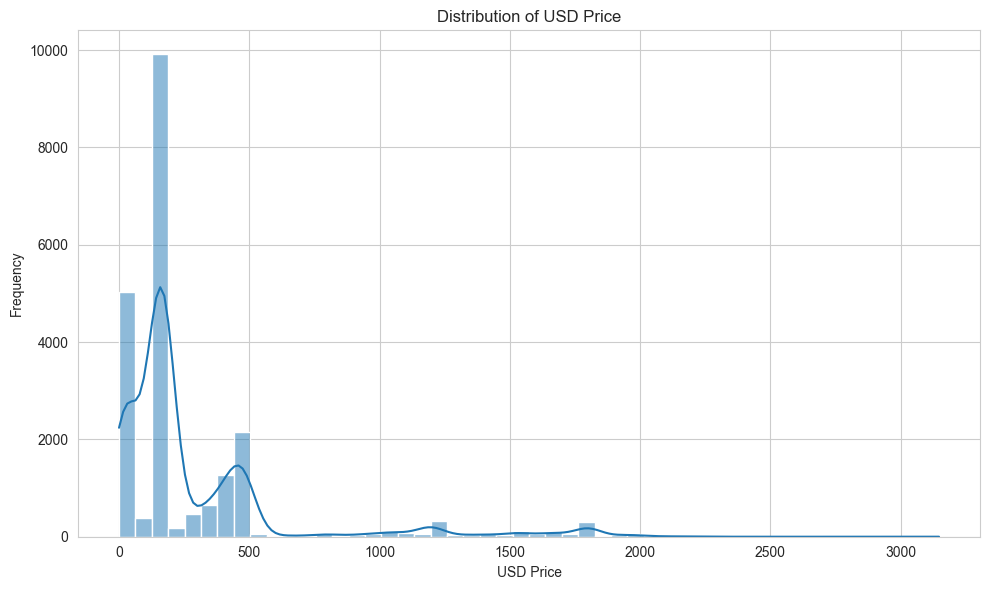

In [49]:
#Create a histogram to visualize the distribution of USD_PRICE.
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")

# Create a histogram of USD_PRICE
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='USD_PRICE', bins=50, kde=True)
plt.title('Distribution of USD Price')
plt.xlabel('USD Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

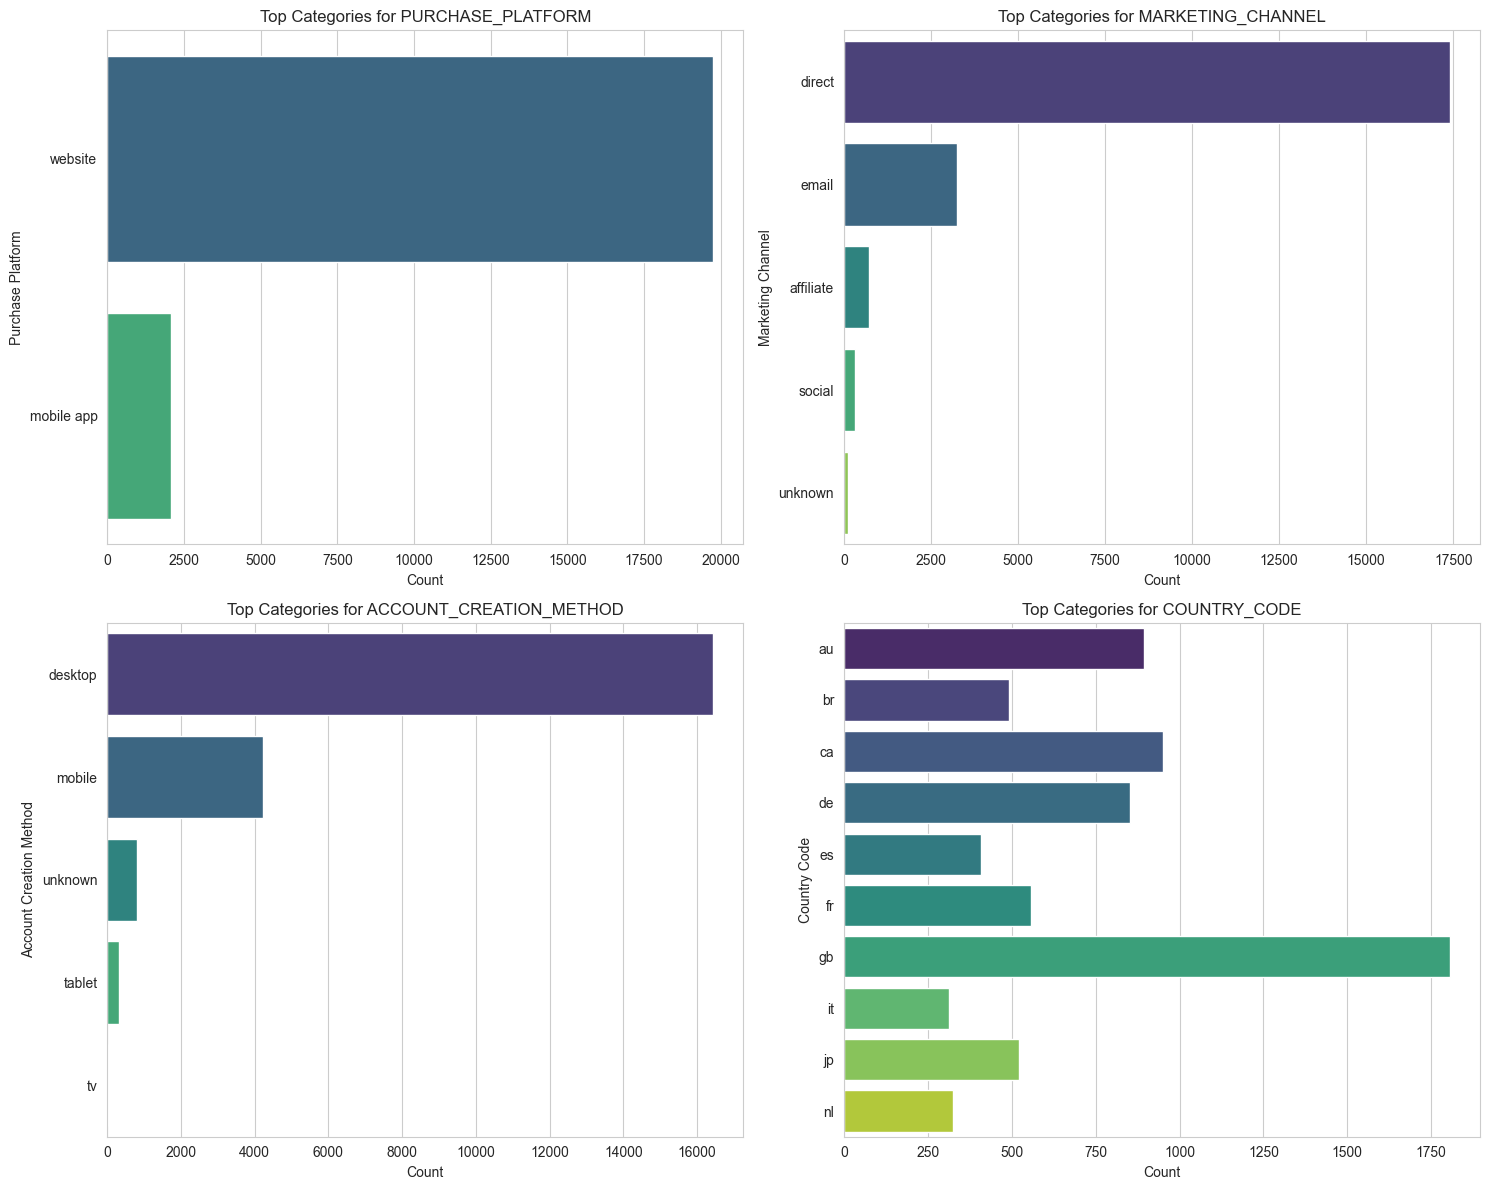

In [50]:
# Create bar plots to show the counts of top categories for PURCHASE_PLATFORM, MARKETING_CHANNEL, ACCOUNT_CREATION_METHOD, and COUNTRY_CODE.

# Create bar plots for top categories of specified columns
categorical_cols_for_barplot = ['PURCHASE_PLATFORM', 'MARKETING_CHANNEL', 'ACCOUNT_CREATION_METHOD', 'COUNTRY_CODE']

# Determine the number of plots and calculate the grid size
n_cols = 2
n_rows = (len(categorical_cols_for_barplot) + n_cols - 1) // n_cols

plt.figure(figsize=(15, n_rows * 6))

for i, col in enumerate(categorical_cols_for_barplot):
    plt.subplot(n_rows, n_cols, i + 1)
    # Get the top 10 categories, including 'unknown' if present and not in top 10
    top_categories = df[col].value_counts().nlargest(10).index.tolist()
    if 'unknown' in df[col].unique() and 'unknown' not in top_categories:
         # If 'unknown' is not in the top 10, include it and re-sort
        top_categories = df[col].value_counts().nlargest(11).index.tolist()
        top_categories.sort(key=lambda x: (x != 'unknown', x)) # Sort to put 'unknown' at the end or keep original order
        if len(top_categories) > 10:
            top_categories = top_categories[:10] # Keep only top 10 including 'unknown' if added

    sns.countplot(data=df, y=col, order=top_categories, palette='viridis')
    plt.title(f'Top Categories for {col}')
    plt.xlabel('Count')
    plt.ylabel(col.replace('_', ' ').title())
    plt.xticks(rotation=0) # Ensure x-axis labels are horizontal

plt.tight_layout()
plt.show()

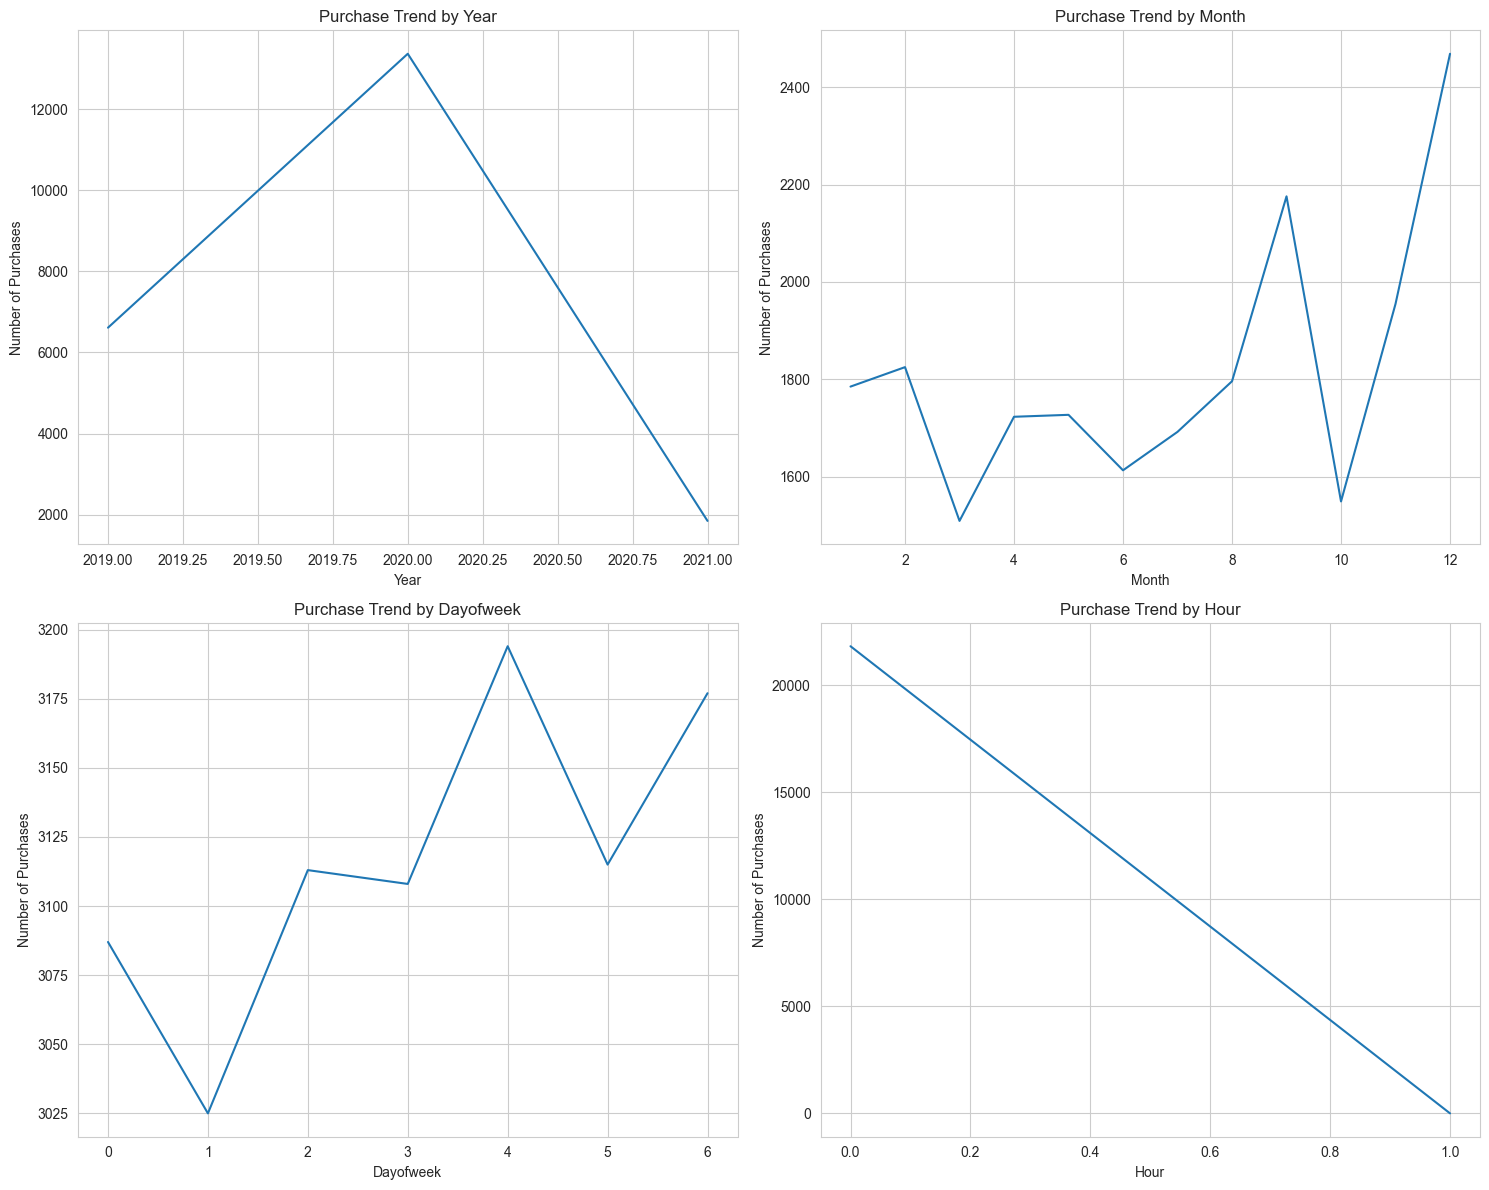

In [51]:
# Create line plots to show the trends of purchases over time (by year, month, day of week, and hour) using the extracted time features.

# Create line plots to show trends over time
time_features = ['purchase_year', 'purchase_month', 'purchase_dayofweek', 'purchase_hour']

# Determine the number of plots and calculate the grid size
n_cols = 2
n_rows = (len(time_features) + n_cols - 1) // n_cols

plt.figure(figsize=(15, n_rows * 6))

for i, feature in enumerate(time_features):
    plt.subplot(n_rows, n_cols, i + 1)
    # Group by the time feature and count occurrences
    time_trend = df[feature].value_counts().sort_index()
    sns.lineplot(x=time_trend.index, y=time_trend.values)
    plt.title(f'Purchase Trend by {feature.replace("purchase_", "").title()}')
    plt.xlabel(feature.replace('purchase_', '').title())
    plt.ylabel('Number of Purchases')
    plt.xticks(rotation=0) # Ensure x-axis labels are horizontal

plt.tight_layout()
plt.show()

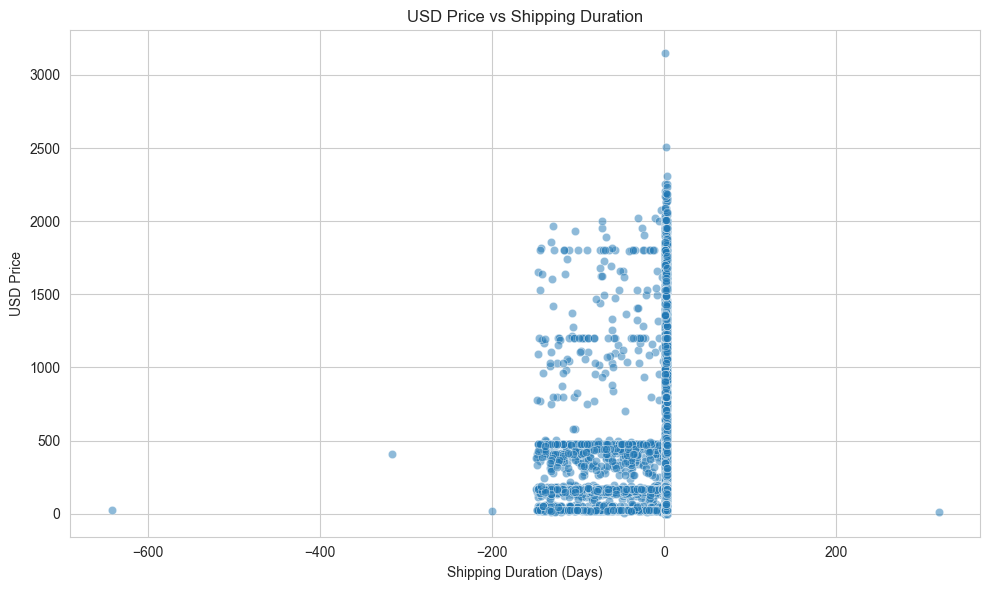

In [52]:
# Create a scatter plot to visualize the relationship between USD_PRICE and shipping_duration_days.

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='shipping_duration_days', y='USD_PRICE', alpha=0.5)
plt.title('USD Price vs Shipping Duration')
plt.xlabel('Shipping Duration (Days)')
plt.ylabel('USD Price')
plt.tight_layout()
plt.show()

c:\Users\User\anaconda3\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


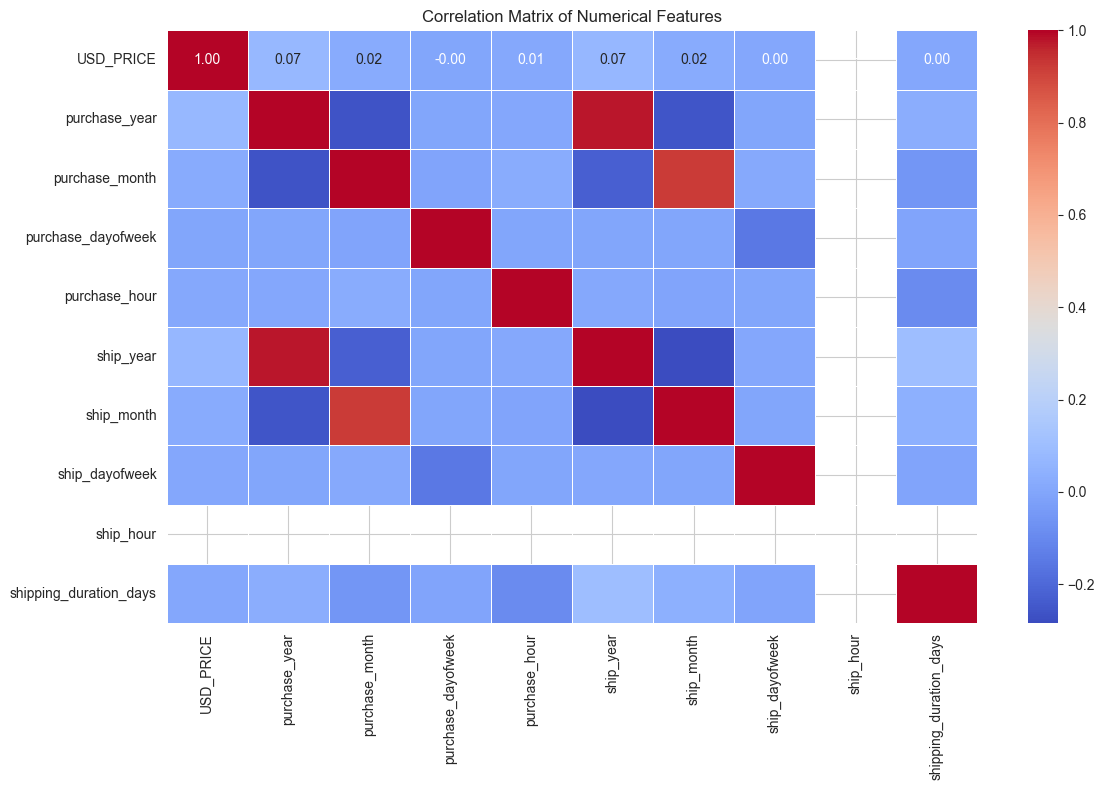

In [53]:
# Generate a heatmap to visualize the correlation matrix of the numerical features.
# Select relevant numerical columns including the engineered feature

numerical_cols_for_corr = ['USD_PRICE', 'purchase_year', 'purchase_month', 'purchase_dayofweek',
                           'purchase_hour', 'ship_year', 'ship_month', 'ship_dayofweek',
                           'ship_hour', 'shipping_duration_days']

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols_for_corr].corr()

# Generate the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

## Data splitting

### Subtask:
Split the cleaned and prepared data into training and testing sets.


**Reasoning**:
Import the necessary function for splitting data and define the features and target variable based on the previous data wrangling step.

In [54]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
# Assuming 'USD_PRICE' is the target variable for prediction
X = df_final_features.drop('USD_PRICE', axis=1)
y = df_final_features['USD_PRICE']

In [55]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (17455, 166)
Shape of X_test: (4364, 166)
Shape of y_train: (17455,)
Shape of y_test: (4364,)


## Model training

### Subtask:
Train a suitable machine learning model to predict trends and patterns relevant to the identified stakeholder questions.

In [56]:
#Import the RandomForestRegressor model from scikit-learn and train it on the training data. Then make predictions on the test data.
from sklearn.ensemble import RandomForestRegressor

# Instantiate the model
# Using RandomForestRegressor as it's generally robust and performs well on various datasets.
# Setting a random_state for reproducibility.
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

## Model evaluation

### Subtask:
Evaluate the performance of the trained model using appropriate metrics and provide insights on its predictive capabilities.

Calculate and print the evaluation metrics (MSE, RMSE, R-squared) and provide a brief interpretation.

In [57]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# Print the calculated metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error (MSE): 150044.61
Root Mean Squared Error (RMSE): 387.36
R-squared (R2) Score: -0.05


In [58]:
# Provide a brief interpretation
print("\n--- Interpretation of Model Performance Metrics ---\n")
print(f"- The MSE of {mse:.2f} represents the average squared difference between the actual and predicted USD prices. Lower values indicate better performance.\n")
print(f"- The RMSE of {rmse:.2f} is the square root of the MSE and provides a measure of the typical error magnitude in the same units as the USD price. An RMSE of {rmse:.2f} means that, on average, the model's predictions are off by approximately ${rmse:.2f}.\n")
print(f"- The R-squared score of {r2:.2f} indicates the proportion of the variance in the actual USD prices that is predictable from the features. An R-squared of {r2:.2f} suggests that approximately {r2:.2%} of the variability in USD prices can be explained by the model.\n")


--- Interpretation of Model Performance Metrics ---

- The MSE of 150044.61 represents the average squared difference between the actual and predicted USD prices. Lower values indicate better performance.

- The RMSE of 387.36 is the square root of the MSE and provides a measure of the typical error magnitude in the same units as the USD price. An RMSE of 387.36 means that, on average, the model's predictions are off by approximately $387.36.

- The R-squared score of -0.05 indicates the proportion of the variance in the actual USD prices that is predictable from the features. An R-squared of -0.05 suggests that approximately -5.04% of the variability in USD prices can be explained by the model.



## Model evaluation

Evaluate the performance of the trained model using appropriate metrics and provide insights on its predictive capabilities.

In [59]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)


# Print the calculated metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error (MSE): 150044.61
Root Mean Squared Error (RMSE): 387.36
R-squared (R2) Score: -0.05


In [60]:
# Provide a brief interpretation
print("\n--- Interpretation of Model Performance Metrics ---")
print(f"The MSE of {mse:.2f} represents the average squared difference between the actual and predicted USD prices. Lower values indicate better performance.")
print(f"The RMSE of {rmse:.2f} is the square root of the MSE and provides a measure of the typical error magnitude in the same units as the USD price. An RMSE of {rmse:.2f} means that, on average, the model's predictions are off by approximately ${rmse:.2f}.")
print(f"The R-squared score of {r2:.2f} indicates the proportion of the variance in the actual USD prices that is predictable from the features. An R-squared of {r2:.2f} suggests that approximately {r2:.2%} of the variability in USD prices can be explained by the model.")


--- Interpretation of Model Performance Metrics ---
The MSE of 150044.61 represents the average squared difference between the actual and predicted USD prices. Lower values indicate better performance.
The RMSE of 387.36 is the square root of the MSE and provides a measure of the typical error magnitude in the same units as the USD price. An RMSE of 387.36 means that, on average, the model's predictions are off by approximately $387.36.
The R-squared score of -0.05 indicates the proportion of the variance in the actual USD prices that is predictable from the features. An R-squared of -0.05 suggests that approximately -5.04% of the variability in USD prices can be explained by the model.
